In [1]:
from pathlib import Path
from book_loader import BookLoader
from typing import Dict, List
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
spacy.prefer_gpu()

True

In [2]:
data_path = Path("data/D5627-Dolan.docx").expanduser().resolve()
assert data_path.exists()

In [3]:
book = BookLoader(data_path)
chapters: Dict[int, List[str]] = book.chapters

/home/ahmedm/anaconda3/envs/LDS/lib/python3.10/site-packages/simplify_docx/iterators/generic.py:193: UnexpectedElementWarning: Skipping unexpected tag: {http://schemas.openxmlformats.org/wordprocessingml/2006/main}pict
  warn("Skipping unexpected tag: %s" % (current.tag),


In [4]:
chapters.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [5]:
chapters[0]

["Nous croyons que cette nouvelle édition paraît à point nommé, car le monde organisationnel est soumis à des exigences de productivité historiques, exigences qui demeurent, faut-il l'admettre, complexes à conjuguer avec une promotion et un soutien de la santé psychologique au travail. Si certains cadres envisagent stratégiquement d'accroître la productivité qualitative et quantitative de leur personnel en les poussant à la limite de leurs capacités, trop souvent ces mêmes gestionnaires ont de la difficulté à entrevoir les effets humains collatéraux de cette quête productiviste. Ils ne voient pas (ou simplement, sous-estiment) l'incidence directe qu'a sur leur propre vie et leur santé les pressions psychologiques qu'ils subissent ainsi que celles qu'ils font conséquemment subir à leur équipe de travail. Il serait évidemment utopique d'espérer aujourd'hui rencontrer des contextes de travail exempts de toutes formes de stress. Le père du stress, Hans Selye, l'exprimait assez simplement l

In [6]:
chapters_without_tables = {
    i: list(filter(lambda p: isinstance(p, str), chap))
    for i, chap in chapters.items()}

In [7]:
df = pd.DataFrame(data={"chapters": chapters_without_tables.keys()})

df["words_count"] = df["chapters"].apply(
    lambda i: sum(map(lambda p: len(p.split()) if isinstance(p, str) else 0,
                      chapters_without_tables[i])))

df["unique_words_count"] = df["chapters"].apply(
    lambda i: len(set('\n'.join(chapters_without_tables[i]).split())))

df["stop_words_count"] = df["chapters"].apply(
    lambda i: sum(map(lambda p: sum(1 for w in p.split() if w in fr_stop)
                      if isinstance(p, str) else 0,
                      chapters_without_tables[i])))

df.style.hide(axis='index')

chapters,words_count,unique_words_count,stop_words_count
0,4639,1747,2111
1,8005,2638,3437
2,11345,3495,4728
3,13340,4066,5574
4,15267,4768,6732
5,20563,5429,8998


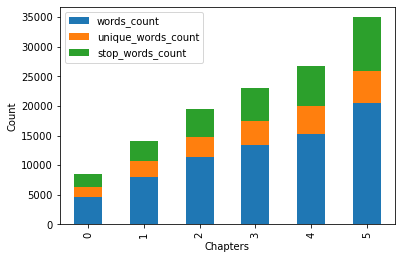

In [8]:
bar_plot = df.iloc[:, 1:].plot.bar(stacked=True, xlabel="Chapters", ylabel="Count")
# TODO: Investigate the linear ascension of counts

In [10]:
plt.savefig("stats.jpg")

<Figure size 432x288 with 0 Axes>